In [1]:
r"""
Inputs
------
- water_depth
- boundaries
- potentials_onshore

Outputs
-------

Description
-----------
Plot maps of potentials

Plot potential cost curves
"""
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
# import rioxarray as rxr
import rasterio as rio
import numpy as np

In [10]:
path_boundaries_eez = "../build/shapes/eez.geojson"
path_boundaries_onshore = "../data/europe-98-zones.geojson/europe-98-zones.geojson"

path_water_depth = "../data/potentials_offshore/gebco_2023_sub_ice_topo/GEBCO_2023_sub_ice_topo.nc"
path_natura2000 = "../data/potentials_offshore/natura2000_areas/eea_v_3035_100_k_natura2000_p_2021_v12_r01/SHP/Natura2000_end2021_rev1_epsg3035.shp"
path_availability_onshore = "tbd"

In [11]:
boundaries_eez = gpd.read_file(path_boundaries_eez)
boundaries_onshore = gpd.read_file(path_boundaries_onshore)
natura2000 = gpd.read_file(path_natura2000)

In [12]:
water_depth = xr.open_dataset(path_water_depth)

In [13]:
water_depth = water_depth.coarsen(dim={"lat": 20, "lon": 20}, boundary="trim").mean()
water_depth = water_depth.rio.write_crs("epsg:4326")
water_depth = water_depth.rio.clip(boundaries_eez.geometry).drop("spatial_ref")

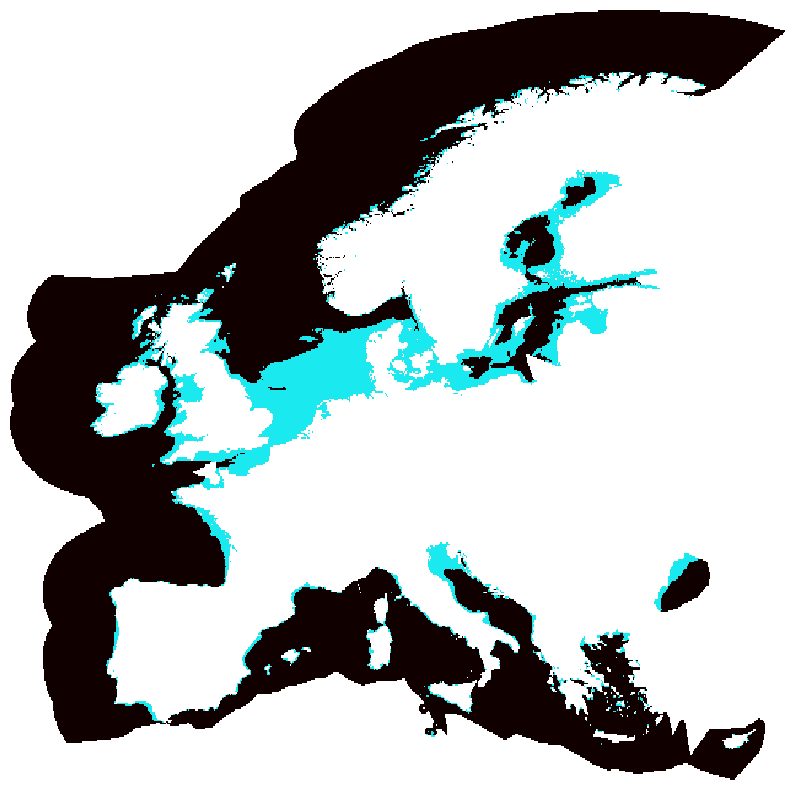

In [91]:
threshold = -60
water_shallow = ((water_depth.elevation < 0) & (water_depth.elevation > threshold)).astype(int)
water_deep = ((water_depth.elevation < 0) & (water_depth.elevation < threshold)).astype(int)

from matplotlib.colors import ListedColormap
colors1 = [(0, 0, 0, 0), "#1aeaef"]
cmap1 = ListedColormap(colors1)
colors2 = [(0, 0, 0, 0), "#675fb5"]
cmap2 = ListedColormap(colors2)
colors3 = [(0, 0, 0, 0), "#100000"]
cmap3 = ListedColormap(colors3)


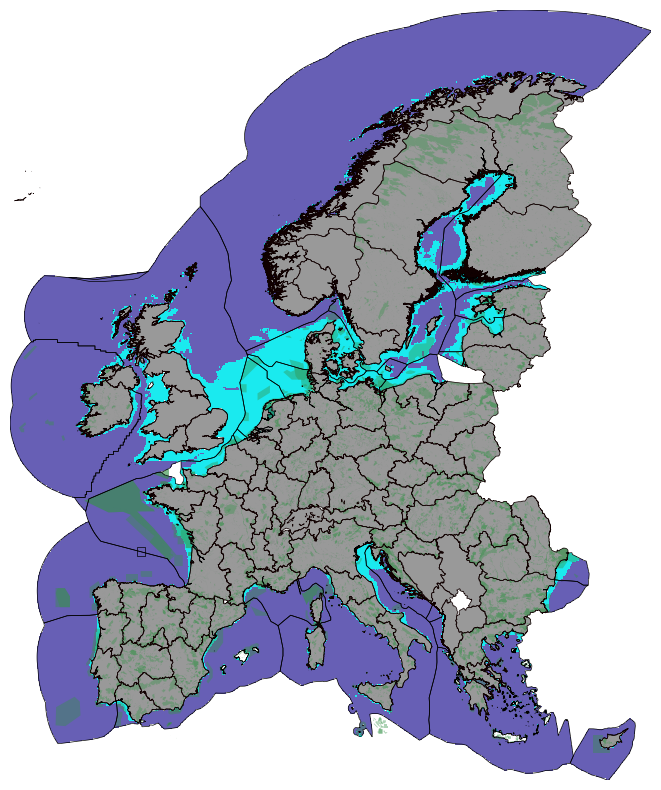

In [109]:
# TODO: Crete and Kosovo are missing and some region in front of the coast of Normandy
# TODO show natura exclusion
# TODO show onshore potentials on NUTS3 resolution
fig, ax = plt.subplots(figsize=(15, 10))

water_shallow.plot(ax=ax, cmap=cmap1, add_colorbar=False)
water_deep.plot(ax=ax, cmap=cmap2, add_colorbar=False)
boundaries_eez.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#000000')
boundaries_onshore.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#100000')
boundaries_onshore.geometry.plot(ax=ax, color='#000000', alpha=0.4)
natura2000.geometry.to_crs("epsg:4326").plot(ax=ax, color='#369249', alpha=0.4)

ax.set_axis_off()
plt.show()

In [ ]:
# TODO: Plot potential areas onshore and offshore
# you should find them in euro-calliope? No, they are downloaded from potential for electricity autarky data on zenodo, which does not include shapefiles. 
# To get them would require to rerun the pipeline. Not sure if that would be sufficient.

In [136]:
capacity_factors_offshore_deep_awe = xr.open_dataset("../build/capacity_factors/capacity_factors_offshore_deep_awe.nc")
capacity_factors_offshore_shallow_awe = xr.open_dataset("../build/capacity_factors/capacity_factors_offshore_shallow_awe.nc")
capacity_factors_onshore_awe = xr.open_dataset("../build/capacity_factors/capacity_factors_onshore_awe.nc")
# capacity_factors_offshore_deep_hawt = xr.open_dataset("../build/capacityfactors/capacityfactors_hawt.nc")


def assign_cf_to_region(capacity_factors, boundaries):

    df = capacity_factors["__xarray_dataarray_variable__"].mean("time").to_dataframe()

    df = df.join(boundaries.geometry)

    df = gpd.GeoDataFrame(df)
    
    return df


gdf = assign_cf_to_region(capacity_factors_offshore_deep_awe, boundaries_eez)


In [140]:
gdf

,__xarray_dataarray_variable__,geometry
dim_0,,
0,0.476346,"POLYGON ((-7.48092 37.49540, -7.48088 37.49512..."
1,0.603447,"POLYGON ((-7.25544 55.06781, -7.25541 55.06787..."
2,0.362085,"POLYGON ((26.03711 40.72984, 26.02346 40.72030..."
3,0.437254,"POLYGON ((-5.00000 45.00833, -5.66667 45.00833..."
4,0.616777,"POLYGON ((-5.53417 60.02639, -6.08000 59.94222..."
5,0.000000,"POLYGON ((9.09889 41.27111, 8.99889 41.27111, ..."
6,0.000000,"POLYGON ((17.64799 42.88872, 17.64387 42.88342..."
7,0.000000,"POLYGON ((13.72261 45.59452, 13.72266 45.59270..."
8,0.288864,"POLYGON ((13.24486 45.76003, 13.24517 45.75947..."


<Axes: >

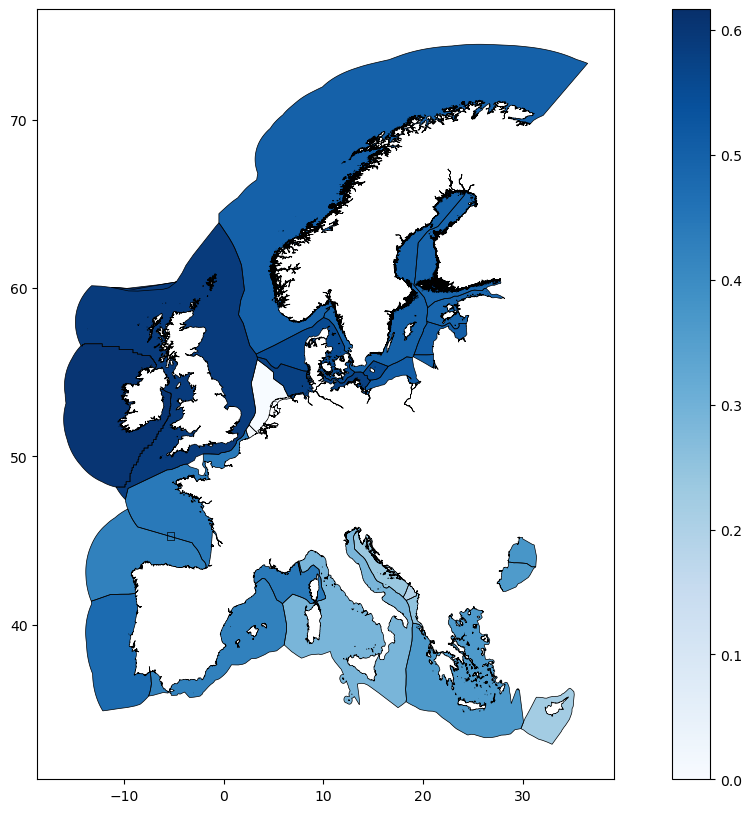

In [144]:

# plot geometries and color them according to capacity factor
fig, ax = plt.subplots(figsize=(15, 10))
boundaries_eez.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#000000')
gdf.plot(ax=ax, column="__xarray_dataarray_variable__", legend=True, cmap="Blues")

In [2]:
wind_speed_era5_model_level = xr.load_dataset("../build/cutouts/cutout-era5-model-level_adapted.nc")

In [9]:
wind_speed_era5_model_level.coarsen(x=2, boundary="pad").mean().coarsen(y=2, boundary="pad").mean()


<xarray.Dataset>
Dimensions:     (time: 52584, y: 81, x: 109)
Coordinates:
  * x           (x) float64 -16.88 -16.38 -15.88 -15.38 ... 36.12 36.62 37.0
  * y           (y) float64 71.88 71.38 70.88 70.38 ... 33.38 32.88 32.38 32.0
  * time        (time) datetime64[ns] 2013-01-01 ... 2018-12-31T23:00:00
    lon         (x) float64 -16.88 -16.38 -15.88 -15.38 ... 36.12 36.62 37.0
    lat         (y) float64 71.88 71.38 70.88 70.38 ... 33.38 32.88 32.38 32.0
Data variables:
    u           (time, y, x) float32 -0.9301 -0.7177 -0.4938 ... -6.487 -5.322
    v           (time, y, x) float32 -20.7 -20.36 -20.0 ... 11.07 9.048 8.243
    wind_speed  (time, y, x) float32 20.72 20.37 20.01 ... 13.32 11.14 9.812
Attributes:
    Conventions:        CF-1.6
    history:            2023-09-21 18:47:12 GMT by grib_to_netcdf-2.25.1: /op...
    module:             era5
    dx:                 0.25
    dy:                 0.25
    prepared_features:  ['u', 'v']

In [15]:
mean_ml = wind_speed_era5_model_level.wind_speed.mean("time")
mean_ml = mean_ml.rio.write_crs("epsg:4326").drop("spatial_ref")

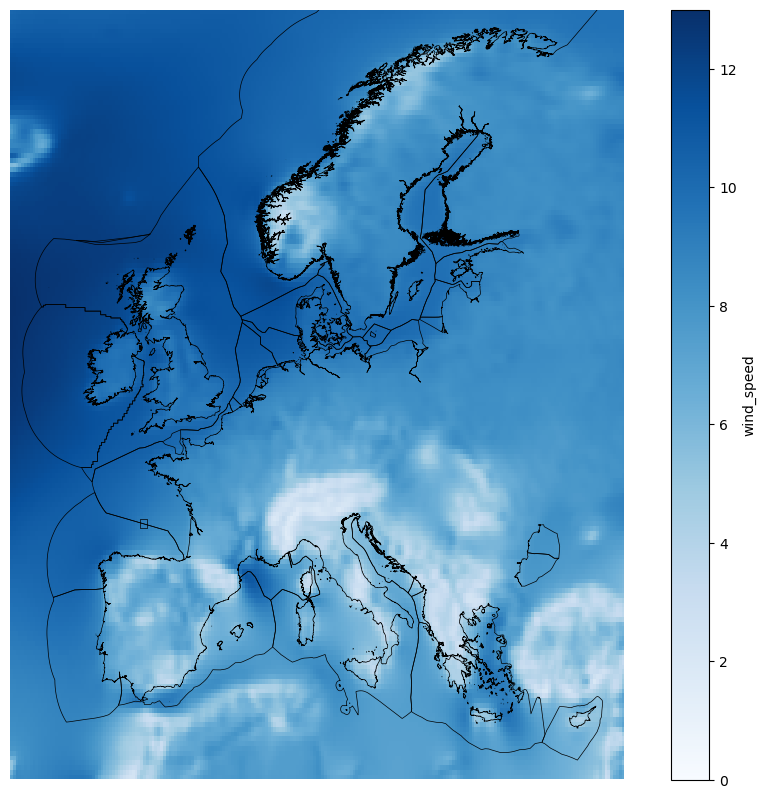

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
boundaries_eez.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#000000')
mean_ml.plot(cmap="Blues", ax=ax, vmin=0, vmax=mean_ml.max())

ax.set_axis_off()
plt.show()

In [17]:
wind_speed_era5 = xr.load_dataset("../build/cutouts/cutout-era5.nc")
wind_speed_era5

<xarray.Dataset>
Dimensions:           (x: 180, y: 134, time: 8760)
Coordinates:
  * x                 (x) float64 -16.8 -16.5 -16.2 -15.9 ... 36.3 36.6 36.9
  * y                 (y) float64 32.1 32.4 32.7 33.0 ... 71.1 71.4 71.7 72.0
  * time              (time) datetime64[ns] 2014-01-01 ... 2014-12-31T23:00:00
    lon               (x) float64 -16.8 -16.5 -16.2 -15.9 ... 36.3 36.6 36.9
    lat               (y) float64 32.1 32.4 32.7 33.0 ... 71.1 71.4 71.7 72.0
Data variables: (12/13)
    height            (y, x) float32 -10.76 7.708 5.146 ... -0.2428 0.0964
    wnd100m           (time, y, x) float32 2.444 1.845 2.161 ... 7.317 7.159
    wnd_azimuth       (time, y, x) float32 1.705 1.027 0.6822 ... 1.465 1.38
    roughness         (time, y, x) float32 5.227e-05 5.227e-05 ... 5.221e-05
    influx_toa        (time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    influx_direct     (time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                ...
    albedo            (time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    solar_altitude    (time, y, x) float64 -1.152 -1.157 ... -0.7063 -0.7059
    solar_azimuth     (time, y, x) float64 4.99 4.996 5.001 ... 0.2821 0.2884
    temperature       (time, y, x) float32 291.4 290.8 290.3 ... 275.2 275.2
    soil temperature  (time, y, x) float32 292.8 292.6 292.5 ... 275.8 275.7
    runoff            (time, y, x) float32 0.0 0.0 0.0 ... 2.328e-10 2.328e-10
Attributes:
    module:             era5
    prepared_features:  ['temperature', 'height', 'runoff', 'influx', 'wind']
    chunksize_time:     100
    dx:                 0.3
    dy:                 0.3
    Conventions:        CF-1.6
    history:            2023-08-30 15:30:29 GMT by grib_to_netcdf-2.25.1: /op...

In [18]:

mean = wind_speed_era5.wnd100m.mean("time")
mean = mean.rio.write_crs("epsg:4326").drop("spatial_ref")


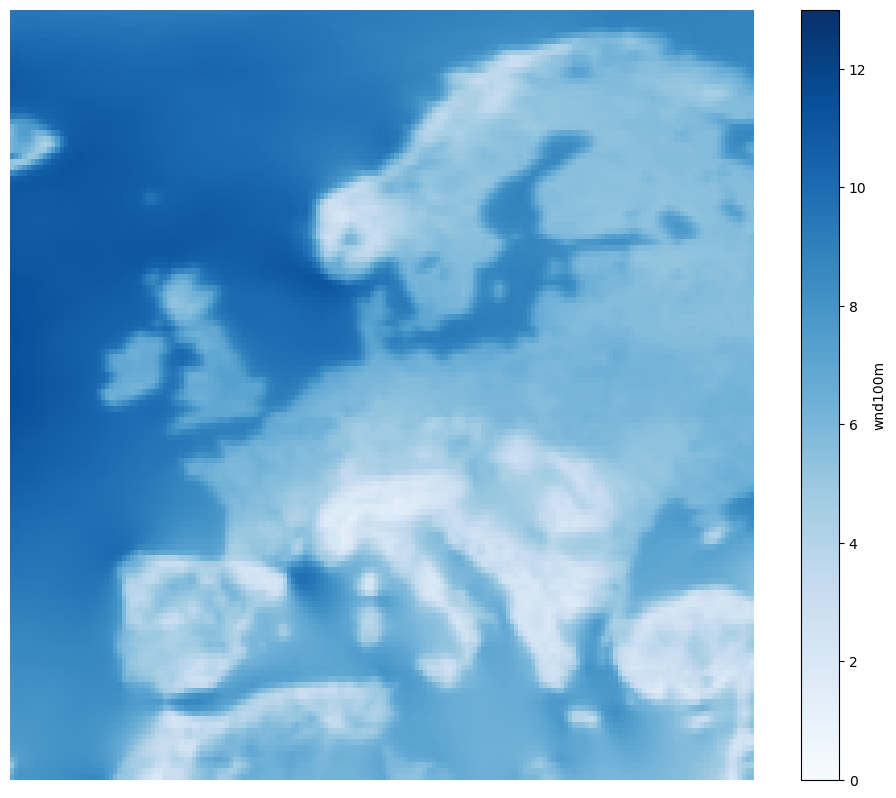

In [19]:

fig, ax = plt.subplots(figsize=(12, 10))
# boundaries_eez.geometry.boundary.plot(ax=ax, linewidth=0.5, color='#000000')
mean.plot(cmap="Blues", ax=ax, vmin=0, vmax=mean_ml.max())

ax.set_axis_off()
plt.show()